In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB tbo the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/test-file/tested.csv


<h1>Titanic Dataset Description</h1>

The Titanic dataset is a well-known dataset that provides information about the passengers aboard the RMS Titanic, which tragically sank on its maiden voyage in 1912. This dataset has been widely used in machine learning and data science projects to predict survival outcomes based on various passenger attributes.

<h3>The dataset contains the following columns:</h3>

<b>PassengerId:</b> Unique identifier for each passenger.<br>
<b>Survived:</b> Binary value indicating whether the passenger survived (1) or did not survive (0).<br>
<b>Pclass:</b> The passenger's class of travel (1st, 2nd, or 3rd class).<br>
<b>Name:</b> The passenger's name.<br>
<b>Sex:</b> The passenger's gender (male or female).<br>
<b>Age:</b> The passenger's age in years. Fractional values indicate age less than one year.<br>
<b>SibSp:</b> The number of siblings/spouses aboard the Titanic.<br>
<b>Parch:</b> The number of parents/children aboard the Titanic.<br>
<b>Ticket:</b> The passenger's ticket number.<br>
<b>Fare:</b> The fare paid by the passenger for the ticket.<br>
<b>Cabin:</b> The cabin number occupied by the passenger (if available).<br>
<b>Embarked:</b> The port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).<br>
The goal of this dataset is to predict the survival outcome of the passengers based on their characteristics. The "Survived" column serves as the target variable, and the other columns can be used as features for building predictive models.

It's important to note that the dataset may contain missing values, which need to be handled appropriately before performing any analysis or modeling.
    </h5>

# <i>Importing the DataSet</i>

In [2]:
df = pd.read_csv("/kaggle/input/test-file/tested.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [7]:
import matplotlib.pyplot as plt

# <i>Checking for the Null values</i>

In [8]:
df.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [9]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<h3>So we can see [ Age, Fare, Cabin ] has null values</h3>

<h3>But we have to check if there are outliers Visually</h3>

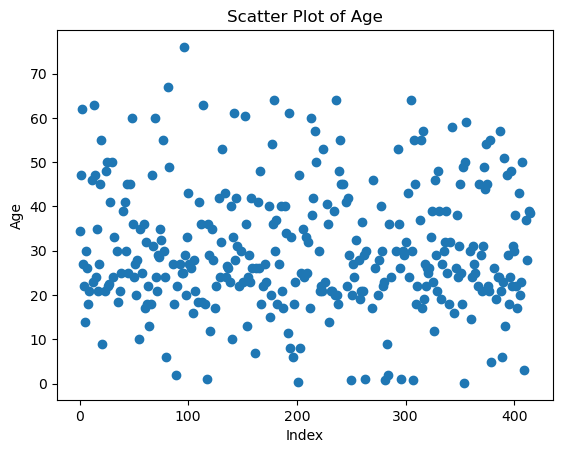

Outliers:
    PassengerId  Survived  Pclass  \
96          988         1       1   

                                                 Name     Sex   Age  SibSp  \
96  Cavendish, Mrs. Tyrell William (Julia Florence...  female  76.0      1   

    Parch Ticket   Fare Cabin Embarked  
96      0  19877  78.85   C46        S  


In [10]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with a column named 'Age'

# Create a scatter plot of Age
plt.scatter(df.index, df['Age'])
plt.xlabel('Index')
plt.ylabel('Age')
plt.title('Scatter Plot of Age')
plt.show()

# Calculate the z-scores for each age value
z_scores = (df['Age'] - df['Age'].mean()) / df['Age'].std()

# Set a threshold for identifying outliers (e.g., z-score > 3 or < -3)
outlier_threshold = 3

# Find the indices of outliers
outlier_indices = df.index[abs(z_scores) > outlier_threshold]

# Print the outliers
print("Outliers:")
print(df.loc[outlier_indices])

<p><i> So we found 3 certain Outliers for our selected threshold value & viewed the dataset visually & it seems to be random and we can actually use <span style="background-color:yellow"><b>Mean Imputation method to resolve missing values</b></span> which may not be good in case of high number of outliers but in this case thus can be helpful to resolve the missing values problem in the dataset.
    </i></p>

# Resolving missing values for Age column

In [11]:
age_mean_imputated = df['Age'].mean()
age_mean_imputated = age_mean_imputated.round


df["Age"]=df["Age"].fillna(age_mean_imputated)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## <span style="background-color:yellow">Resolving the missing value of 'Fare' column</span>


## As there is only one missing value we can drop it!

In [12]:
import numpy as np

# Assuming you have a DataFrame named 'df' with a column named 'Fare'

# Convert the 'Fare' column to a NumPy array
fare_values = df['Fare'].values

# Find the index number of the row with the missing value in the 'Fare' column
missing_index = np.argwhere(np.isnan(fare_values)).flatten()

# Drop the row with the missing value
df.drop(missing_index, inplace=True)

# Check if the row has been dropped by searching for the index number as a key
if any(df.index.isin(missing_index)):
    print("Row with missing value still exists.")
else:
    print("Row with missing value has been dropped.")

print(any(df.index.isin(missing_index))) # prints True if missing value row exist or False if it doesn't

Row with missing value has been dropped.
False


## <span style="background-color:yellow">Resolving the missing value of 'Cabin' column</span>


## As Cabin column is not numeric & have few unique values we would use ffill() & bfill()

In [13]:
df['Cabin'].unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

In [14]:
df["Cabin"].value_counts()

B57 B59 B63 B66    3
B45                2
C89                2
C55 C57            2
A34                2
                  ..
E52                1
D30                1
E31                1
C62 C64            1
C105               1
Name: Cabin, Length: 76, dtype: int64

### We can forward fill the values where there are missing values

In [15]:
df["Cabin"] = df["Cabin"].ffill()

In [16]:
df["Cabin"].value_counts()

C89        33
C55 C57    14
C39        12
F33        12
A34        12
           ..
E39 E41     1
E60         1
C53         1
D43         1
F E57       1
Name: Cabin, Length: 76, dtype: int64

In [17]:
df.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
dtype: bool

In [18]:
df.isna().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin          12
Embarked        0
dtype: int64

### There are 12 missing values even after the ffill() , Maybe there are continous missing values or previous row has missing value which cannot be replaced in place of next row's missing value.

### So we will use bfill()

In [19]:
missing_indices = df["Cabin"].isnull()
missing_rows = df[missing_indices].index

print(missing_rows)

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')


In [20]:
df["Cabin"]=df["Cabin"].bfill()

In [21]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## Rounding up all the floating values in the dataset

In [22]:
df.round()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,8.0,B45,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0,B45,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,10.0,B45,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,9.0,B45,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.0,B45,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,<built-in method round of numpy.float64 object...,0,0,A.5. 3236,8.0,C78,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,109.0,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.0,C105,S
416,1308,0,3,"Ware, Mr. Frederick",male,<built-in method round of numpy.float64 object...,0,0,359309,8.0,C105,S


# <i>Questions</i>

<h5> 
1) Gender Distribution
2) age distribution & survival rate
3) Age group survival rate
4) Embarked Survival Rate
</h5>

### <span style="background-color:yellow">1) Gender Distribution & survival rate</span>

In [23]:
gender_counts = df['Sex'].value_counts()
print(gender_counts)

male      265
female    152
Name: Sex, dtype: int64


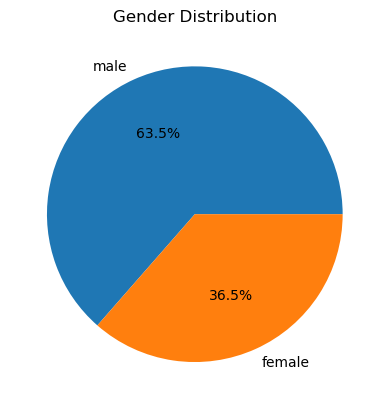

In [24]:
import matplotlib.pyplot as plt

# Count the number of males and females
gender_counts = df['Sex'].value_counts()

# Create a pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')

# Add title
plt.title('Gender Distribution')

# Display the plot
plt.show()


In [25]:
# Filter the dataset to include only male passengers
men = df[df['Sex'] == 'male']

# Calculate the survival rate for men
survival_rate_men = men['Survived'].mean()

# Print the survival rate of men
print("Survival rate of men:", survival_rate_men)


Survival rate of men: 0.0


In [26]:
# Filter the dataset to include only female passengers
women = df[df['Sex'] == 'female']

# Calculate the survival rate for women
survival_rate_women = women['Survived'].mean()

# Print the survival rate of women
print("Survival rate of women:", survival_rate_women)


Survival rate of women: 1.0


In [27]:
import numpy as np

# Encode 'Sex' column with numerical values
df['Sex_Encoded'] = np.where(df['Sex'] == 'female', 1, 0)

# Calculate the correlation coefficient between 'Sex_Encoded' and 'Survived'
correlation = df['Sex_Encoded'].corr(df['Survived'])

# Print the correlation coefficient
print("Correlation between gender and survival:", correlation)


Correlation between gender and survival: 1.0


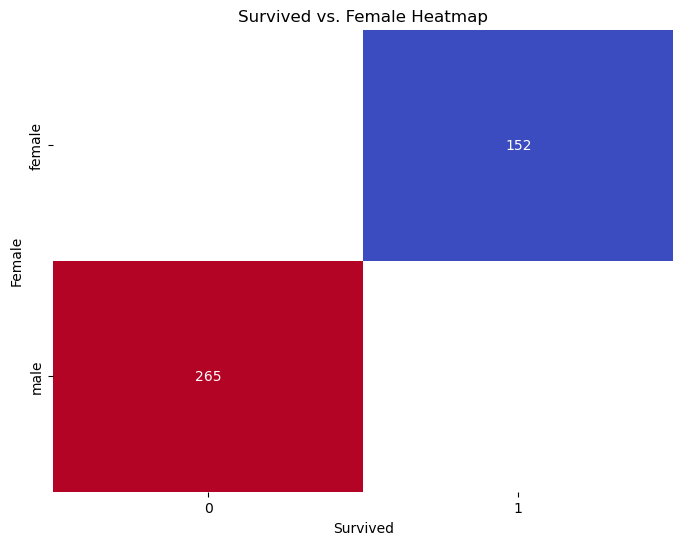

In [28]:
import seaborn as sns

# Create a pivot table to summarize the data
pivot_table = df.pivot_table(index='Sex', columns='Survived', aggfunc='size')

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='.0f', cbar=False)
plt.title('Survived vs. Female Heatmap')
plt.xlabel('Survived')
plt.ylabel('Female')
plt.show()
    
    


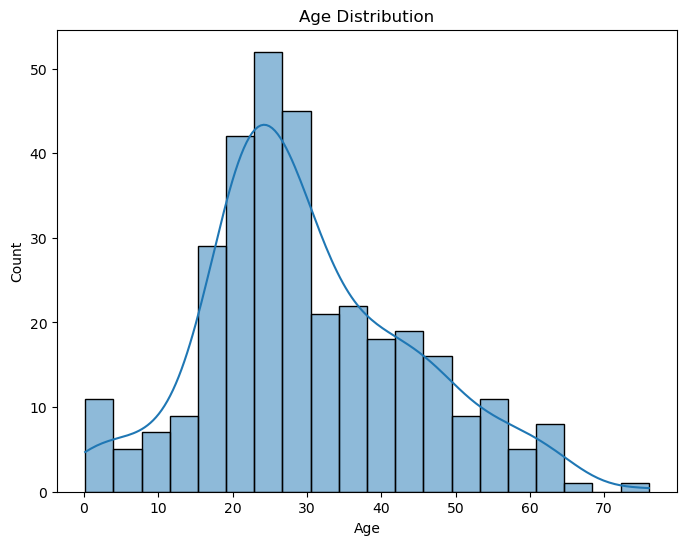

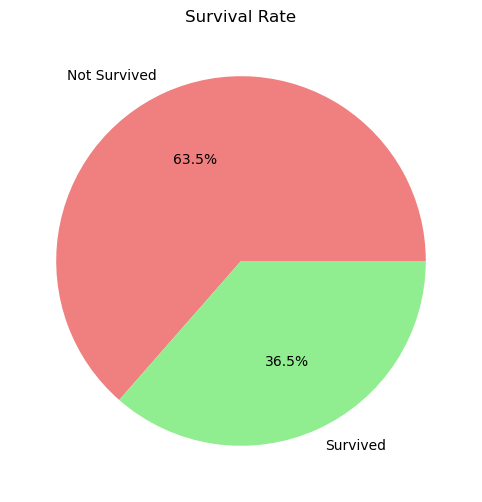

In [29]:

# Convert 'Age' column to numeric data type
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Age Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'].dropna(), bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Rest of the code for survival rate plot...

# Survival Rate
survival_counts = df['Survived'].value_counts()
survival_labels = ['Not Survived', 'Survived']

plt.figure(figsize=(8, 6))
plt.pie(survival_counts, labels=survival_labels, autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title('Survival Rate')
plt.show()

In [30]:
data_Agecat=[]
for x in df["Age"]:
    if x <=20:
        data_Agecat.append("Teen")
    elif x>20 and x<=45:
        data_Agecat.append("Adult")
    else:
        data_Agecat.append("Old")

df.insert(6,"Age_Catagory",data_Agecat)

In [31]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Age_Catagory,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Encoded
0,892,0,3,"Kelly, Mr. James",male,34.5,Adult,0,0,330911,7.8292,B45,Q,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,Old,1,0,363272,7.0000,B45,S,1
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,Old,0,0,240276,9.6875,B45,Q,0
3,895,0,3,"Wirz, Mr. Albert",male,27.0,Adult,0,0,315154,8.6625,B45,S,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,Adult,1,1,3101298,12.2875,B45,S,1


In [32]:
df["Age_Catagory"].value_counts()

Adult    211
Old      137
Teen      69
Name: Age_Catagory, dtype: int64

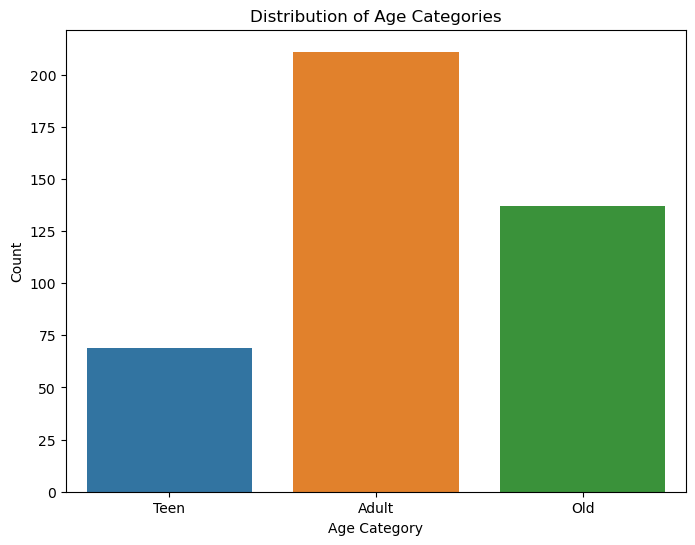

In [33]:

# Plot distribution of age categories
plt.figure(figsize=(8, 6))
sns.countplot(x='Age_Catagory', data=df, order=['Teen', 'Adult', 'Old'])
plt.title('Distribution of Age Categories')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.show()


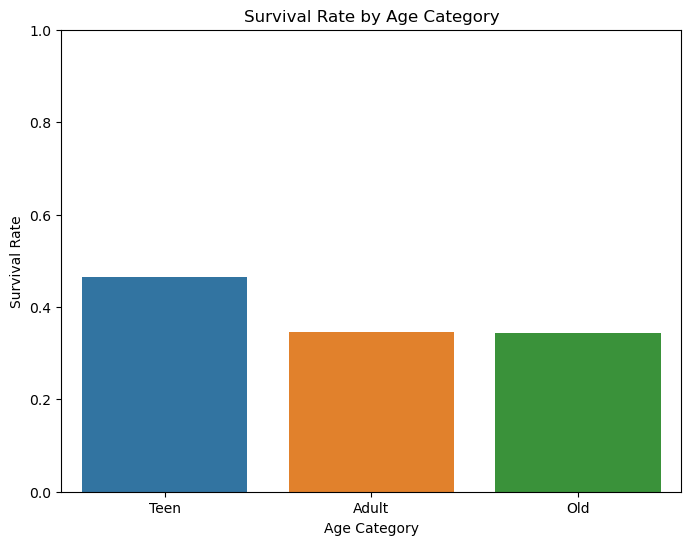

In [34]:

# Calculate survival rate by age category
survival_rate = df.groupby('Age_Catagory')['Survived'].mean().reset_index()

# Plot survival rate by age category
plt.figure(figsize=(8, 6))
sns.barplot(x='Age_Catagory', y='Survived', data=survival_rate, order=['Teen', 'Adult', 'Old'])
plt.title('Survival Rate by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.show()


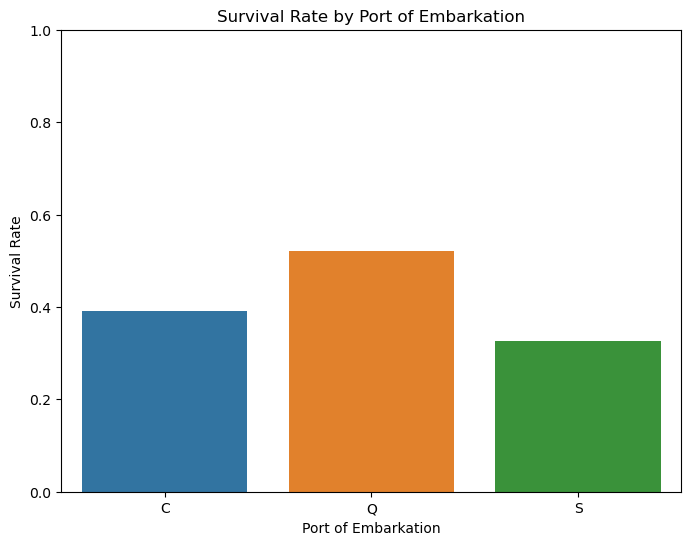

In [35]:

# Calculate survival rate by port of embarkation
survival_rate = df.groupby('Embarked')['Survived'].mean().reset_index()

# Plot survival rate by port of embarkation
plt.figure(figsize=(8, 6))
sns.barplot(x='Embarked', y='Survived', data=survival_rate)
plt.title('Survival Rate by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.show()
